<a href="https://colab.research.google.com/github/MarcosGuerrerou/AWS-Cinema-Template/blob/main/Semana%207/Actividad_Semanal_7_Regresiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Semanal -- 7 Regresiones y K means

**TC4029.10 Ciencia y Analítica de Datos**

Profesor: María de la Paz Rico Fernández

Tutor: Bernardo Charles Canales

--

Nombre: Rubén Marcos Ramos Guerrero

Matrícula: A01793131

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [2]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [3]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [4]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

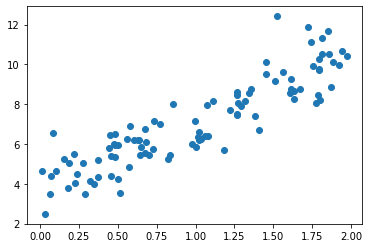

In [5]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [6]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [7]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [8]:
#X_fit[]

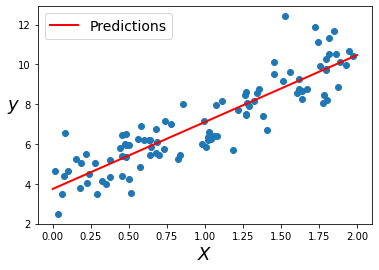

In [9]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [10]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [11]:
X_new.shape

(2, 1)

In [12]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [13]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [14]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [15]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

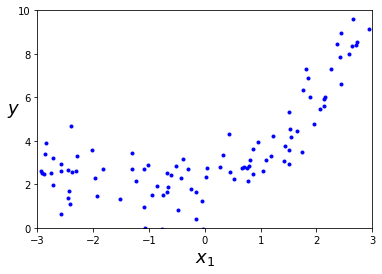

In [16]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [17]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [19]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [20]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [21]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [22]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  1.04X +0.51X^2 + 2.01$

Plot the data and the predictions:

(-3.0, 3.0, 0.0, 10.0)

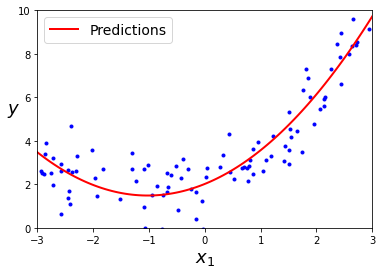

In [23]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [25]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [26]:
len(X)

1000

In [27]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

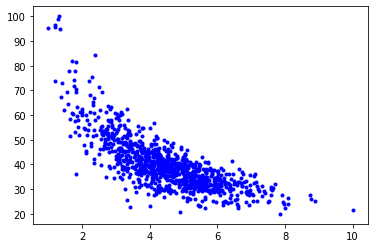

In [28]:
plt.plot(X,y,'b.')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [30]:
#lineal

# Ajustamos el modelo linear a nuestros datos
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

In [31]:
linear_reg.coef_, linear_reg.intercept_

(array([-6.14066196]), 67.51071463726647)

El modelo linear resultó así:

$\hat{y} =  - 6.14X + 67.51$

In [32]:
#polinomial

poly_parametros = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_parametros.fit_transform(X_train)

poly_reg = LinearRegression(fit_intercept=True)
poly_reg.fit(X_poly_train, y_train)
print(poly_reg.coef_, poly_reg.intercept_)


[-17.53372296   1.24487581] 91.35921715093073


El modelo polinomial estimó:

$\hat{y} =  - 17.53 X +1.24X^2 + 91.36$

In [33]:
# Ridge y Lasso
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha = 0.6)

ridge.fit(X_train, y_train)

lasso = Lasso(alpha = 0.6)
lasso.fit(X_train, y_train)

Lasso(alpha=0.6)

In [34]:
print(ridge.coef_, ridge.intercept_)
print(lasso.coef_, lasso.intercept_)

[-6.13821457] 67.49978222513984
[-5.80175618] 65.99682974463352


El modelo linear con regularización de Ridge resultó así:

$\hat{y} =  - 6.14X + 67.5$

El modelo linear con regularización de Lasso resultó así:

$\hat{y} =  - 5.8X + 66$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


Text(0.5, 1.0, 'Lasso')

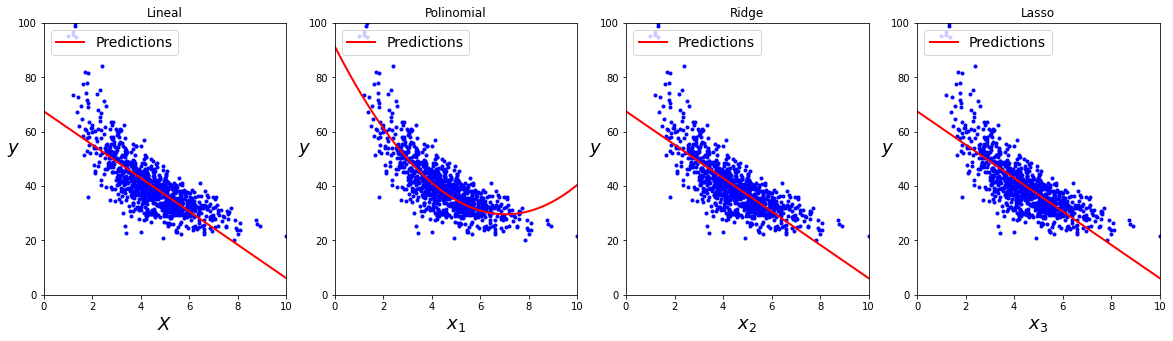

In [35]:
fig, axs = plt.subplots(1,4, figsize = (20,5))

# Creamos un vector en X y Y para representar el regresor
X_lin = np.linspace(0, 10)
y_lin = linear_reg.predict(X_lin[:, np.newaxis])

X_new=np.linspace(0, 10).reshape(50, 1)
X_new_poly = poly_parametros.transform(X_new)
y_new = poly_reg.predict(X_new_poly)

y_ridge = ridge.predict(X_lin[:,np.newaxis])
y_lasso = ridge.predict(X_lin[:,np.newaxis])

# Graficamos los puntos del modelo linear
axs[0].plot(X, y, "b.")
axs[0].plot(X_lin, y_lin, "r-", linewidth=2, label="Predictions")
axs[0].set_xlabel("$X$", fontsize=18)
axs[0].set_ylabel("$y$", rotation=0, fontsize=18)
axs[0].legend(loc="upper left", fontsize=14)
axs[0].axis([0, 10, 0, 100])
axs[0].set_title('Lineal')

# Modelo Polinomial
axs[1].plot(X, y, "b.")
axs[1].plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
axs[1].set_xlabel("$x_1$", fontsize=18)
axs[1].set_ylabel("$y$", rotation=0, fontsize=18)
axs[1].legend(loc="upper left", fontsize=14)
axs[1].axis([0, 10, 0, 100])
axs[1].set_title('Polinomial')


# Lineal c/ Ridge
axs[2].plot(X, y, "b.")
axs[2].plot(X_lin, y_lasso, "r-", linewidth=2, label="Predictions")
axs[2].set_xlabel("$x_2$", fontsize=18)
axs[2].set_ylabel("$y$", rotation=0, fontsize=18)
axs[2].legend(loc="upper left", fontsize=14)
axs[2].axis([0, 10, 0, 100])
axs[2].set_title('Ridge')

# Lineal c/ Lasso
axs[3].plot(X, y, "b.")
axs[3].plot(X_lin, y_lasso, "r-", linewidth=2, label="Predictions")
axs[3].set_xlabel("$x_3$", fontsize=18)
axs[3].set_ylabel("$y$", rotation=0, fontsize=18)
axs[3].legend(loc="upper left", fontsize=14)
axs[3].axis([0, 10, 0, 100])
axs[3].set_title('Lasso')


In [39]:
# Obtenemos predicciones con los datos de prueba
y_pred_lin = linear_reg.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

X_test_poly = poly_parametros.transform(X_test)
y_pred_poly = poly_reg.predict(X_test_poly)



In [40]:
from sklearn import metrics
from sklearn.metrics import r2_score

print("-"*10, "Modelo Lineal", "-"*10)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_lin))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin)))
print('r2_score',r2_score(y_test, y_pred_lin))

print()

print("-"*10, "Modelo Polinomial", "-"*10)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_poly))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))
print('r2_score',r2_score(y_test, y_pred_poly))

print("-"*10, "Modelo Ridge", "-"*10)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_ridge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))
print('r2_score',r2_score(y_test, y_pred_ridge))

print()

print("-"*10, "Modelo Lasso", "-"*10)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))
print('r2_score',r2_score(y_test, y_pred_lasso))

---------- Modelo Lineal ----------
Error medio Absoluto (MAE): 4.476124068321028
Root Mean Squared Error: 5.809995849705496
r2_score 0.6171546016469538

---------- Modelo Polinomial ----------
Error medio Absoluto (MAE): 4.210513366450576
Root Mean Squared Error: 5.552673677967161
r2_score 0.6503157354529493
---------- Modelo Ridge ----------
Error medio Absoluto (MAE): 4.475804944071778
Root Mean Squared Error: 5.80945919127288
r2_score 0.6172253238050689

---------- Modelo Lasso ----------
Error medio Absoluto (MAE): 4.448805461902875
Root Mean Squared Error: 5.753660201318787
r2_score 0.6245429990975169


(0.5, 0.7)

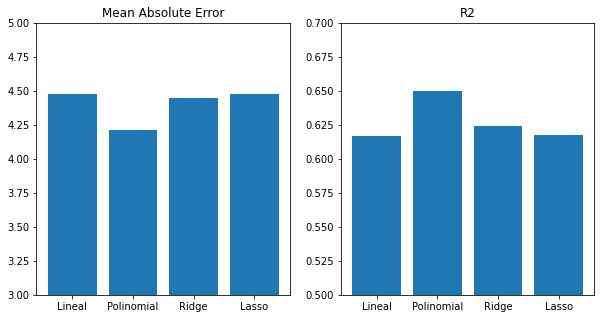

In [49]:
fig, axes = plt.subplots(1,2, figsize= (10, 5))

axes[0].bar(x = ['Lineal', 'Polinomial', 'Ridge', 'Lasso'], 
        height = np.array([metrics.mean_absolute_error(y_test, y_from_model) for y_from_model in [y_pred_lin, y_pred_poly, y_pred_lasso, y_pred_ridge]]))
axes[0].set_title('Mean Absolute Error')
axes[0].set_ylim([3, 5])

axes[1].bar(x = ['Lineal', 'Polinomial', 'Ridge', 'Lasso'], 
        height = np.array([r2_score(y_test, y_from_model) for y_from_model in [y_pred_lin, y_pred_poly, y_pred_lasso, y_pred_ridge]]))
axes[1].set_title('R2')
axes[1].set_ylim([0.5, 0.7])

**Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?**

El método polinomial es el que visualmente se adapta más a la forma de los datos, según los gráficos de dispersión, y esto se comprueba al comparar el MAE y R2, donde este modelo cuanta con menor Error que los demás y una puntuación de R2 mayor.

Para esto se utilizaron 15% de los datos como prueba y el 85% restante para entrenamiento y se utilizó el Mean Absolute Error y R2 como métricas de evaluación.

El Error Absoluto Promedio (MAE) para el modelo polinomial cuadrático terminó siendo de 4.2105, con un R2 de 0.65.

Como conclusión se considera que el modelo tiene un desempeño bueno, puesto que es capaz de representar la naturaleza no lineal del problema con una exactitud aceptable. Sin embargo, este modelo se verá limitado a comparación de un modelo logaritmico, por ejemplo.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [50]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [52]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [53]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


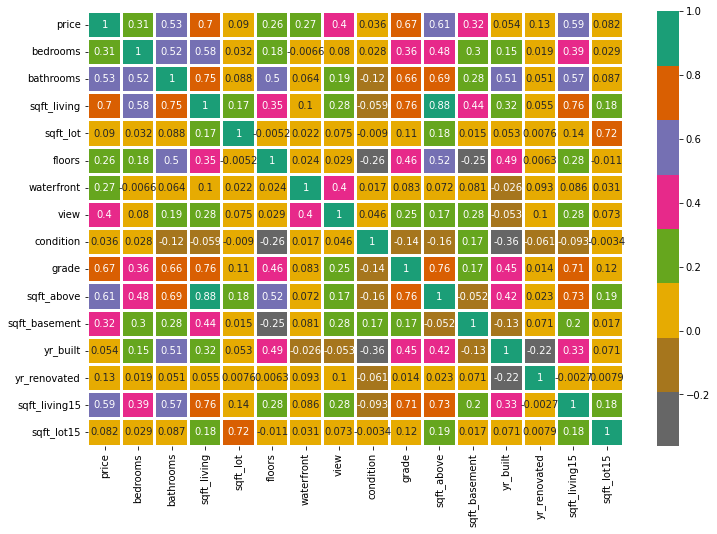

In [54]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [55]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [60]:
#tu codigo aquí

# Modelos Linear, Ridge y Lasso
linear = LinearRegression(fit_intercept=True)
linear.fit(X_train, y_train)

ridge = Ridge(alpha = 0.6)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha = 0.8)
lasso.fit(X_train, y_train)

# Creamos el modelo polinomial y lo ajustamos a las X de entrenamiento
poly_features= PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)

# Ajustamos el modelo
poly_reg = LinearRegression(fit_intercept=True)
poly_reg.fit(X_poly_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


LinearRegression()

In [63]:
# Transformamos los datos de prueba y generamos predicciones.
y_pred_lin = linear.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

X_test_poly = poly_features.transform(X_test)
y_pred_poly = poly_reg.predict(X_test_poly)

print("-"*10, "Modelo Lineal", "-"*10)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_lin))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin)))
print('r2_score',r2_score(y_test, y_pred_lin))

print()

print("-"*10, "Modelo Polinomial", "-"*10)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_poly))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))
print('r2_score',r2_score(y_test, y_pred_poly))

print("-"*10, "Modelo Ridge", "-"*10)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_ridge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))
print('r2_score',r2_score(y_test, y_pred_ridge))

print()

print("-"*10, "Modelo Lasso", "-"*10)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))
print('r2_score',r2_score(y_test, y_pred_lasso))

---------- Modelo Lineal ----------
Error medio Absoluto (MAE): 137480.13882733323
Root Mean Squared Error: 232133.3676240722
r2_score 0.6579723205007892

---------- Modelo Polinomial ----------
Error medio Absoluto (MAE): 121313.84710967973
Root Mean Squared Error: 186261.48278206724
r2_score 0.7797924413783968
---------- Modelo Ridge ----------
Error medio Absoluto (MAE): 137486.70243755504
Root Mean Squared Error: 232152.50145291712
r2_score 0.6579159342185672

---------- Modelo Lasso ----------
Error medio Absoluto (MAE): 137480.48500454662
Root Mean Squared Error: 232134.29551050236
r2_score 0.6579695861806002


(0.5, 0.8)

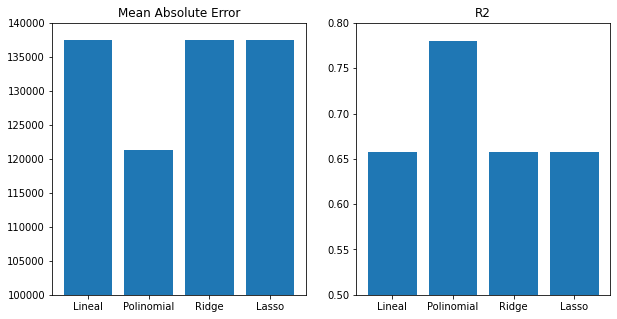

In [65]:
fig, axes = plt.subplots(1,2, figsize= (10, 5))

axes[0].bar(x = ['Lineal', 'Polinomial', 'Ridge', 'Lasso'], 
        height = np.array([metrics.mean_absolute_error(y_test, y_from_model) for y_from_model in [y_pred_lin, y_pred_poly, y_pred_lasso, y_pred_ridge]]))
axes[0].set_title('Mean Absolute Error')
axes[0].set_ylim([100000, 140000])

axes[1].bar(x = ['Lineal', 'Polinomial', 'Ridge', 'Lasso'], 
        height = np.array([r2_score(y_test, y_from_model) for y_from_model in [y_pred_lin, y_pred_poly, y_pred_lasso, y_pred_ridge]]))
axes[1].set_title('R2')
axes[1].set_ylim([0.5, 0.8])

**Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?**


En este segundo ejercicio, nuevamente la regresión polinomial cuadrática tuvo el mejor desempeño de todos. Se utilizaron 10% de los datos para evaluación y el 90% restante para entrenamiento.

En el modelo polinomial cuadrático se tuvo un error absoluto promedio de 121,313, para un precio de propiedad promedio de 5 Millones, representa una variabilidad de +- 5% en la predicción.

El modelo tienen un buen desempeño ya que el rango que tiene el error medio cae dentro de un valor aceptable sin sufrir alta varianza en las predicciones.

**Conclusiones**

Ambos datasets explorados en esta actividad presentan relaciones no lineales, donde una regresión puramente  lineal es inherentemente incapaz de generalizarlo. Esto también nos ayuda a explicar porqué los modelos con regularización Ridge y Lasso no mejoraban mucho en desempeño comparados con el modelo lineal, ya que estas regularizaciones suelen tener otros usos, como prevenir el sobre-ajuste a los datos de entrenamiento.

Los modelos polinomiales permiten introducir curvas dentro de la regresión que se puede adaptar mejor a estas relaciones no lineales, por ello es que logra mejor rendimiento a pesar de no ser perfecto.